In [4]:
!git clone https://github.com/rickiepark/GDL_code.git

fatal: destination path 'GDL_code' already exists and is not an empty directory.


In [2]:
%cd GDL_code/
!pip install -r requirements.txt

/content/GDL_code
     |████████████████████████████████| 96 kB 3.0 MB/s 
     |████████████████████████████████| 157 kB 23.8 MB/s 
     |████████████████████████████████| 701 kB 100.0 MB/s 
     |████████████████████████████████| 10.6 MB 56.7 MB/s 
     |████████████████████████████████| 2.8 MB 83.8 MB/s 
     |████████████████████████████████| 113 kB 103.6 MB/s 
     |████████████████████████████████| 768 kB 91.0 MB/s 
     |████████████████████████████████| 111 kB 86.2 MB/s 
     |████████████████████████████████| 177 kB 107.5 MB/s 
     |████████████████████████████████| 126 kB 105.6 MB/s 
     |████████████████████████████████| 89 kB 11.6 MB/s 
     |████████████████████████████████| 126 kB 101.4 MB/s 
     |████████████████████████████████| 312 kB 93.5 MB/s 
     |████████████████████████████████| 51 kB 759 kB/s 
     |████████████████████████████████| 59 kB 9.1 MB/s 
     |████████████████████████████████| 89 kB 11.8 MB/s 
     |████████████████████████████████| 89 kB 12.1 MB/s 

In [7]:
%cd GDL_code

/content/GDL_code


In [8]:
import os


from utils.loaders import load_mnist
from models.AE import Autoencoder

Using TensorFlow backend.


In [9]:
SECTION = 'vae'
RUN_ID = '0001'
DATA_NAME = 'digit'
RUN_FOLDER = f'run/{SECTION}/'
RUN_FOLDER = '_'.join([RUN_ID, DATA_NAME])

if not os.path.exists(RUN_FOLDER):
    os.mkdir(RUN_FOLDER)
    os.mkdir(os.path.join(RUN_FOLDER, 'viz'))
    os.mkdir(os.path.join(RUN_FOLDER, 'images'))
    os.mkdir(os.path.join(RUN_FOLDER, 'weights'))

MODE = 'build'

In [10]:
(x_train, y_train), (x_test, y_test) = load_mnist()

In [11]:
AE = Autoencoder(
    input_dim = (28,28,1),
    encoder_conv_filters = [32,64,64,64],
    encoder_conv_kernel_size = [3,3,3,3],
    encoder_conv_strides = [1,2,2,1],
    decoder_conv_t_filters = [64,64,32,1],
    decoder_conv_t_kernel_size = [3,3,3,3],
    decoder_conv_t_strides = [1,2,2,1],
    z_dim = 2
)

if MODE == 'build':
    AE.save(RUN_FOLDER)
else:
    AE.load_weights(os.path.join(RUN_FOLDER, 'weights/weights.h5'))

Instructions for updating:
Colocations handled automatically by placer.


In [12]:
AE.encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_input (InputLayer)   (None, 28, 28, 1)         0         
_________________________________________________________________
encoder_conv_0 (Conv2D)      (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 28, 28, 32)        0         
_________________________________________________________________
encoder_conv_1 (Conv2D)      (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
encoder_conv_2 (Conv2D)      (None, 7, 7, 64)          36928     
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 7, 7, 64)          0         
__________

In [13]:
AE.decoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
decoder_input (InputLayer)   (None, 2)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 3136)              9408      
_________________________________________________________________
reshape_1 (Reshape)          (None, 7, 7, 64)          0         
_________________________________________________________________
decoder_conv_t_0 (Conv2DTran (None, 7, 7, 64)          36928     
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 7, 7, 64)          0         
_________________________________________________________________
decoder_conv_t_1 (Conv2DTran (None, 14, 14, 64)        36928     
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 14, 14, 64)        0         
__________

In [14]:
LEARNING_RATE = 5e-4
BATCH_SIZE = 32
INITIAL_EPOCH = 0

In [15]:
AE.compile(LEARNING_RATE)

In [18]:
# Error : cannot import name 'py3' from fin 'PIL._utils'
!pip uninstall Pillow
!pip install Pillow

Found existing installation: Pillow 5.4.1
Uninstalling Pillow-5.4.1:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/PIL/*
    /usr/local/lib/python3.7/dist-packages/Pillow-5.4.1.dist-info/*
Proceed (y/n)? y
  Successfully uninstalled Pillow-5.4.1
     |████████████████████████████████| 3.1 MB 4.2 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [16]:
from PIL import Image

AE.train(
    x_train[:1000],
    batch_size = BATCH_SIZE,
    epochs = 200,
    run_folder = RUN_FOLDER,
    initial_epoch = INITIAL_EPOCH
)

Instructions for updating:
Use tf.cast instead.
Epoch 1/200
1000/1000 [==============================] - 2s 2ms/step - loss: 0.1722

Epoch 00001: saving model to 0001_digit/weights/weights.h5
Epoch 2/200
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0808

Epoch 00002: saving model to 0001_digit/weights/weights.h5
Epoch 3/200
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0676

Epoch 00003: saving model to 0001_digit/weights/weights.h5
Epoch 4/200
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0622

Epoch 00004: saving model to 0001_digit/weights/weights.h5
Epoch 5/200
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0589

Epoch 00005: saving model to 0001_digit/weights/weights.h5
Epoch 6/200
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0573

Epoch 00006: saving model to 0001_digit/weights/weights.h5
Epoch 7/200
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0561

Epo

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy.stats import norm

from utils.loaders import load_mnist, load_model

In [19]:
AE_train = load_model(Autoencoder, RUN_FOLDER)

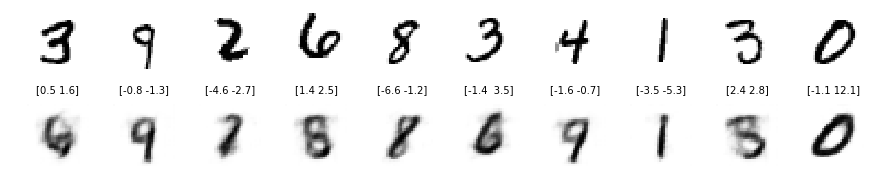

In [23]:
n_to_show = 10
np.random.seed(88)
example_idx = np.random.choice(range(len(x_test)), n_to_show)
example_images = x_test[example_idx]

z_points = AE_train.encoder.predict(example_images)

reconst_images = AE_train.decoder.predict(z_points)

fig = plt.figure(figsize = (15,3))
fig.subplots_adjust(hspace = 0.4, wspace = 0.4)

for i in range(n_to_show):
    img = example_images[i].squeeze()
    ax = fig.add_subplot(2, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, str(np.round(z_points[i],1)), fontsize = 10, ha = 'center', transform = ax.transAxes)
    ax.imshow(img, cmap='gray_r')

for i in range(n_to_show):
    img = reconst_images[i].squeeze()
    ax = fig.add_subplot(2, n_to_show, i + n_to_show + 1)
    ax.axis('off')
    ax.imshow(img, cmap = 'gray_r')

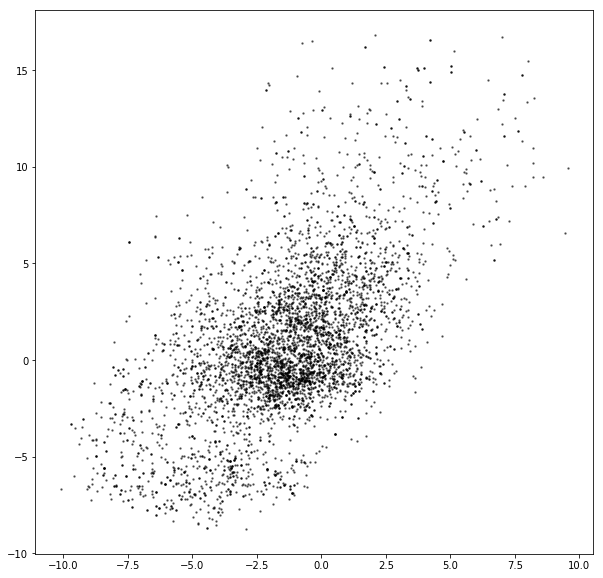

In [24]:
n_to_show = 5000
grid_size = 15
figsize = 10

example_idx = np.random.choice(range(len(x_test)), n_to_show)
example_images = x_test[example_idx]
example_labels = y_test[example_idx]

z_points = AE.encoder.predict(example_images)

min_x = min(z_points[:,0])
max_x = max(z_points[:,0])
min_y = min(z_points[:,1])
max_y = max(z_points[:,1])

plt.figure(figsize = (figsize, figsize))
plt.scatter(z_points[:,0], z_points[:,1], c = 'black', alpha = 0.5, s = 2)

plt.show()

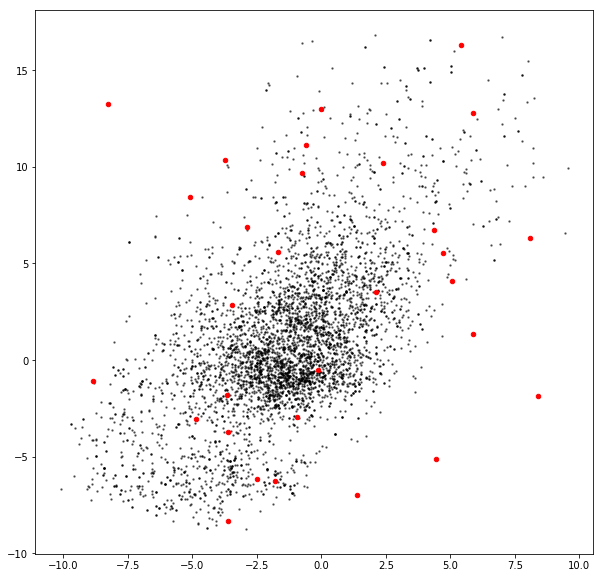

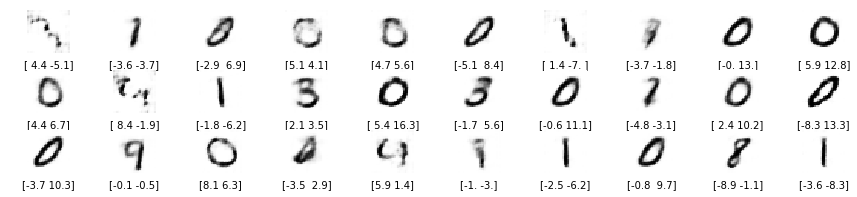

In [26]:
grid_size = 15
figsize = 10

plt.figure(figsize=(figsize, figsize))
plt.scatter(z_points[:,0], z_points[:,1], c = 'black', alpha = 0.5, s = 2)

grid_size = 10
grid_depth = 3
figsize = 15

x = np.random.uniform(min_x, max_x, size = grid_size * grid_depth)
y = np.random.uniform(min_y, max_y, size = grid_size * grid_depth)
z_grid = np.array(list(zip(x,y)))
reconst = AE_train.decoder.predict(z_grid)

plt.scatter(z_grid[:,0], z_grid[:,1], c = 'red', alpha = 1, s = 20)
plt.show()

fig = plt.figure(figsize = (figsize, grid_depth))
fig.subplots_adjust(hspace = 0.4, wspace = 0.4)

for i in range(grid_size * grid_depth):
    ax = fig.add_subplot(grid_depth, grid_size, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, str(np.round(z_grid[i], 1)), fontsize = 10, ha = 'center', transform = ax.transAxes)

    ax.imshow(reconst[i, :,:,0], cmap = 'Greys')

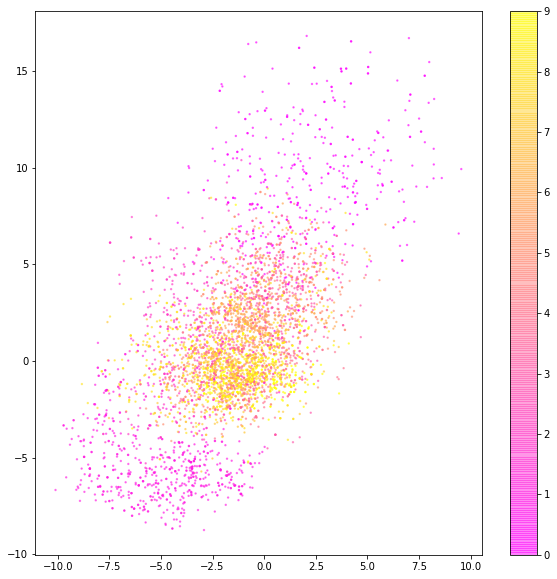

In [28]:
figsize = 10

plt.figure(figsize = (figsize, figsize))
plt.scatter(z_points[:,0], z_points[:,1], cmap = 'spring', c = example_labels, alpha = 0.5, s = 2)
plt.colorbar()

plt.show()

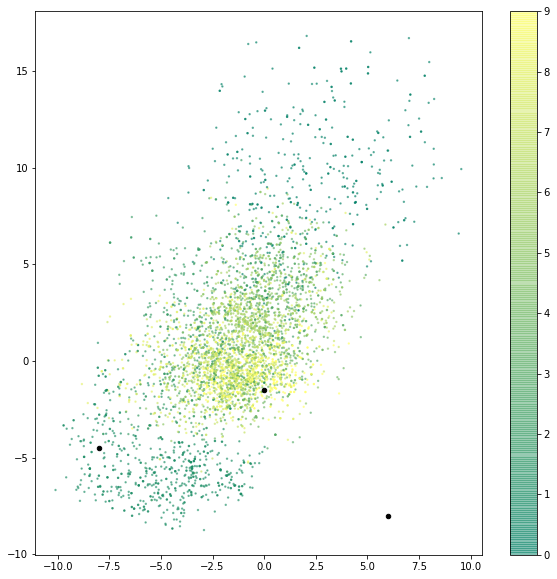

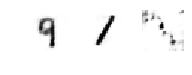

In [30]:
figsize = 10

plt.figure(figsize = (figsize, figsize))
plt.scatter(z_points[:,0], z_points[:, 1], cmap = 'summer', c = example_labels, alpha = 0.5, s = 2)
plt.colorbar()

bad_examples = np.array([[0,-1.5], [-8, -4.5], [6,-8]])
plt.scatter(bad_examples[:,0], bad_examples[:,1], c = 'black', alpha = 1, s = 20)

reconst = AE_train.decoder.predict(bad_examples)

fig = plt.figure(figsize = (figsize, grid_depth))
fig.subplots_adjust(hspace = 0.4, wspace = 0.4)

for i in range(3):
    ax = fig.add_subplot(grid_depth, grid_size, i+1)
    ax.axis('off')

    ax.imshow(reconst[i, :, :, 0], cmap = 'Greys')

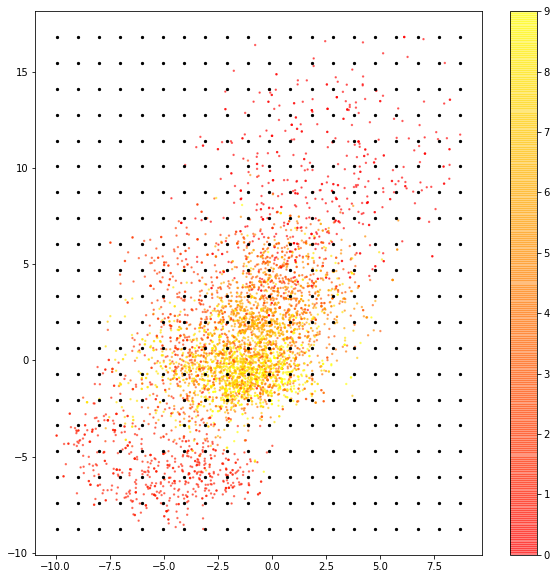

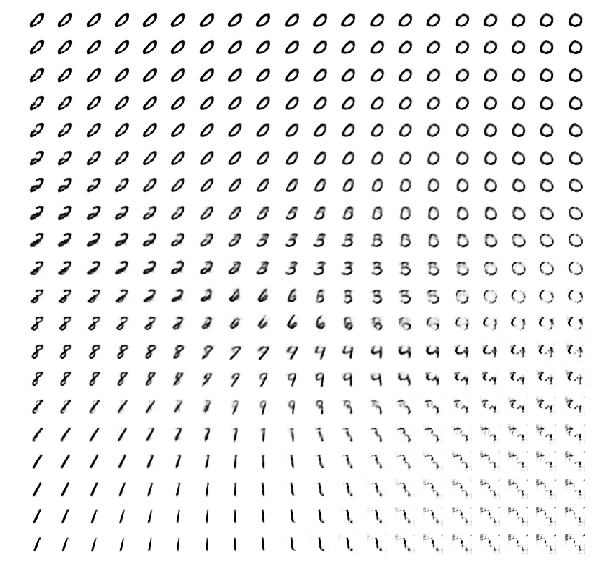

In [32]:
n_to_show = 5000
grid_size = 20

example_idx = np.random.choice(range(len(x_test)), n_to_show)
example_images = x_test[example_idx]
example_labels = y_test[example_idx]

z_points = AE_train.encoder.predict(example_images)

plt.figure(figsize = (figsize, figsize))
plt.scatter(z_points[:, 0], z_points[:, 1], cmap = 'autumn', c = example_labels, alpha = 0.5, s = 2)
plt.colorbar()

x = np.linspace(min(z_points[:, 0]), max(z_points[:, 0]), grid_size)
y = np.linspace(max(z_points[:, 1]), min(z_points[:, 1]), grid_size )
xv, yv = np.meshgrid(x, y)
xv = xv.flatten()
yv = yv.flatten()
z_grid = np.array(list(zip(xv, yv)))

reconst = AE.decoder.predict(z_grid)

plt.scatter(z_grid[:, 0], z_grid[:, 1], c = 'black', alpha = 1, s = 5)

plt.show()

fig = plt.figure(figsize = (figsize, figsize))
fig.subplots_adjust(hspace = 0.4, wspace = 0.4)
for i in range(grid_size ** 2):
    ax = fig.add_subplot(grid_size, grid_size, i + 1)
    ax.axis('off')
    ax.imshow(reconst[i, :, :, 0], cmap = 'Greys')